# Pressue Gradient from Hydrostatic Equilibrium

In [1]:
# Imports
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline

# Hydrostatic Equilibrium
Hydrostatic equilibrium is the force balance between gravity and a pressure gradient.

$dP/dr = -G \frac{M_r \rho}{r^2}$

$dP/dr = -\rho g$

# Let's assume constant density
To simply our caculations, let's assume a constant density or $\rho$ = 3 $g/cm^3$ = 3000 $kg/m^3$

# The parameters of our star - the Sun
$M_{Sun} = 1.989 \times 10^{30}$ kg

$R_{Sun} = 6.95508 \times 10^{8}$ m

# Calculate pressure gradient at one radius

Calculate the pressure gradient at $R = 0.8 R_{Sun}$.

$G = 6.67 \times 10^{-11}$ N m$^2$ kg$^{-2}$

Remember that $M_r = 4/3 \pi r^3 \rho$

In [15]:
Msun = 1.989e30  # kg
Rsun = 6.95508e8 # m
G = 6.67e-11     # N m^2/kg2
rho = 3000.0     # kg/m^3
Mr = 4/3*3.14 * (0.8*Rsun)**3 * rho
dpdr = G * Mr * rho/(0.8*Rsun)**2   # Pa / m
print(dpdr)

1398391.7232384


This is a very large number.  In the earth's atmosphere, the pressure gradient is 9 Pa/m.

# Calculate the pressure gradient for all radii at once
Create an array of radius values from the center to the surface.  Redo your calculation with the radius array.

In [9]:
radius = np.linspace(1e5,Rsun,1000,endpoint=True)
print(radius)

[1.00000000e+05 7.96104104e+05 1.49220821e+06 2.18831231e+06
 2.88441642e+06 3.58052052e+06 4.27662462e+06 4.97272873e+06
 5.66883283e+06 6.36493694e+06 7.06104104e+06 7.75714515e+06
 8.45324925e+06 9.14935335e+06 9.84545746e+06 1.05415616e+07
 1.12376657e+07 1.19337698e+07 1.26298739e+07 1.33259780e+07
 1.40220821e+07 1.47181862e+07 1.54142903e+07 1.61103944e+07
 1.68064985e+07 1.75026026e+07 1.81987067e+07 1.88948108e+07
 1.95909149e+07 2.02870190e+07 2.09831231e+07 2.16792272e+07
 2.23753313e+07 2.30714354e+07 2.37675395e+07 2.44636436e+07
 2.51597477e+07 2.58558519e+07 2.65519560e+07 2.72480601e+07
 2.79441642e+07 2.86402683e+07 2.93363724e+07 3.00324765e+07
 3.07285806e+07 3.14246847e+07 3.21207888e+07 3.28168929e+07
 3.35129970e+07 3.42091011e+07 3.49052052e+07 3.56013093e+07
 3.62974134e+07 3.69935175e+07 3.76896216e+07 3.83857257e+07
 3.90818298e+07 3.97779339e+07 4.04740380e+07 4.11701421e+07
 4.18662462e+07 4.25623504e+07 4.32584545e+07 4.39545586e+07
 4.46506627e+07 4.534676

In [16]:
Mr = 4/3*3.14 * radius**3 * rho
dpdr = G * Mr * rho/radius**2   # Pa / m

## Now plot the pressure gradient as a function of radius

Text(0, 0.5, 'Pressure Gradient')

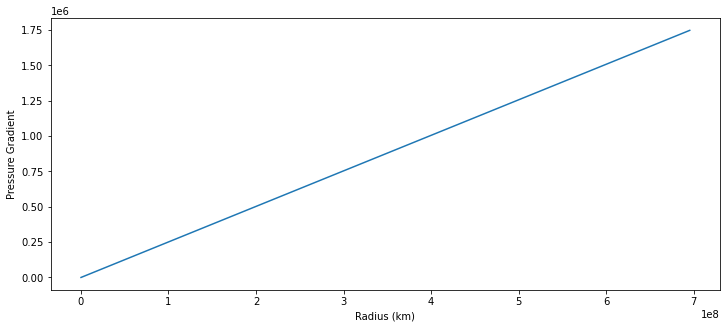

In [17]:
fig = plt.figure(figsize=(12,5))
plt.plot(radius,dpdr)
plt.xlabel('Radius (km)')
plt.ylabel('Pressure Gradient')

# Calculate the Pressure
Calculate the pressure by integrating the pressure gradient from the outside-in assuming that the pressure is zero at the surface.

In [18]:
# Create a new array that will hold the pressure values
pressure = np.zeros(1000)
# Loop over the radius values in the array from the the outside in
pressure_i = 0   # start with zero pressure at surface
for i in np.arange(998,-1,-1):
    radius_i = radius[i]
    dpdr_i = dpdr[i]
    dr_i = radius[i]-radius[i-1]
    pressure_i = pressure[i+1]+dpdr[i] * dr_i
    pressure[i] = pressure_i

In [19]:
pressure

array([6.07087129e+14, 6.07261903e+14, 6.07260510e+14, 6.07257899e+14,
       6.07254071e+14, 6.07249025e+14, 6.07242761e+14, 6.07235279e+14,
       6.07226579e+14, 6.07216661e+14, 6.07205526e+14, 6.07193173e+14,
       6.07179602e+14, 6.07164813e+14, 6.07148806e+14, 6.07131582e+14,
       6.07113139e+14, 6.07093479e+14, 6.07072601e+14, 6.07050505e+14,
       6.07027192e+14, 6.07002660e+14, 6.06976911e+14, 6.06949944e+14,
       6.06921759e+14, 6.06892356e+14, 6.06861736e+14, 6.06829897e+14,
       6.06796841e+14, 6.06762567e+14, 6.06727075e+14, 6.06690365e+14,
       6.06652438e+14, 6.06613292e+14, 6.06572929e+14, 6.06531348e+14,
       6.06488549e+14, 6.06444533e+14, 6.06399298e+14, 6.06352846e+14,
       6.06305176e+14, 6.06256288e+14, 6.06206182e+14, 6.06154858e+14,
       6.06102317e+14, 6.06048558e+14, 6.05993580e+14, 6.05937386e+14,
       6.05879973e+14, 6.05821342e+14, 6.05761494e+14, 6.05700428e+14,
       6.05638144e+14, 6.05574642e+14, 6.05509922e+14, 6.05443984e+14,
      

# Plot the pressure as a function of radius

Text(0, 0.5, 'Pressure (Pa)')

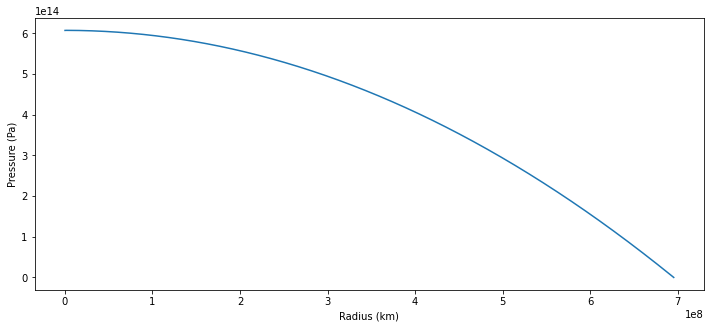

In [20]:
fig = plt.figure(figsize=(12,5))
plt.plot(radius,pressure)
plt.xlabel('Radius (km)')
plt.ylabel('Pressure (Pa)')

The real pressure at the center of the Sun is $2.5 \times 10^{16}$ Pa